# CODE CLAUSE PROJECT TASK 1 - CHURN PREDICTION IN TELECOM INDUSTRY USING LOGISTIC REGRESSION
# DATA SCIENCE INTERN
# NAME: VIGASHKUMAR CT



Importing all the necessary libraries and preprocessing steps

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [6]:
df1 = pd.read_csv("/content/churndata.csv")
df1.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df2 = pd.read_csv("/content/customer_data.csv")
df2.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
df3 = pd.read_csv("/content/internet_data.csv")
df3.head(5)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [9]:
# Merging upon the first two dataset
df_merge = pd.merge(df1, df2, how='inner', on='customerID')
df_merge.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [10]:
# Merging upon the result with the last dataset
df = pd.merge(df_merge, df3, how='inner', on='customerID')
df.head(5)


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
# Finding out the number of rows and columns
df.shape

(7043, 21)

In [91]:
# Assuming df is your DataFrame
summary_statistics = df.describe()

# Print the summary statistics
print(summary_statistics)

            tenure  MonthlyCharges  TotalCharges  SeniorCitizen
count  7032.000000     7032.000000   7032.000000    7032.000000
mean     32.421786       64.798208   2283.300441       0.162400
std      24.545260       30.085974   2266.771362       0.368844
min       1.000000       18.250000     18.800000       0.000000
25%       9.000000       35.587500    401.450000       0.000000
50%      29.000000       70.350000   1397.475000       0.000000
75%      55.000000       89.862500   3794.737500       0.000000
max      72.000000      118.750000   8684.800000       1.000000


In [12]:
# Information about the merged datastet
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [13]:
# Describing the datasets based on certain aspects
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [14]:
# Displaying all the values in the array representation
df.values

array([['7590-VHVEG', 1, 'No', ..., 'No', 'No', 'No'],
       ['5575-GNVDE', 34, 'Yes', ..., 'No', 'No', 'No'],
       ['3668-QPYBK', 2, 'Yes', ..., 'No', 'No', 'No'],
       ...,
       ['4801-JZAZL', 11, 'No', ..., 'No', 'No', 'No'],
       ['8361-LTMKD', 4, 'Yes', ..., 'No', 'No', 'No'],
       ['3186-AJIEK', 66, 'Yes', ..., 'Yes', 'Yes', 'Yes']], dtype=object)

In [15]:
# Getting all the data types for the given attribute names
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

In [33]:
#Convert all categorical to dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,29.85,29.85,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,34,56.95,1889.50,0,0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,0,0
2,2,53.85,108.15,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,45,42.30,1840.75,0,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
4,2,70.70,151.65,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [34]:
# Remove rows with NaN values
df_dummies.dropna(inplace=True)

In [35]:
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [36]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [37]:
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]

In [38]:
#Removing missing values
df.dropna(inplace = True)

In [39]:
#Convert the predictor variable to a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)



In [40]:
# Featuring out the total charges made
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
value = df['MonthlyCharges'] * df['tenure']
df['TotalCharges'] = value.where(df['TotalCharges'] == np.nan, other=df['TotalCharges'])
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

# **`LOGISTIC REGRESSION`**

In [48]:
# LOGISTIC REGRESSION IMPLEMENTATION

# Assume 'Churn' is the target variable and other columns are features
Y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])




In [42]:
print(df_dummies.columns)


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen',
       'PhoneService_No', 'PhoneService_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSu

In [43]:
# Assuming X and y are your feature matrix and target variable
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [44]:
# Find indices where y_train is not NaN
valid_indices = ~np.isnan(Y_train)

# Filter X_train and y_train to keep only valid indices
X_train_clean = X_train[valid_indices]
Y_train_clean = Y_train[valid_indices]

In [45]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Extracting the target variable 'y' and features 'X' from the DataFrame
Y = df_dummies['Churn'].values
X = df_dummies.drop(columns=['Churn'])

# Scaling all the features to a range of 0 to 1 using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [50]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, Y_train)

In [51]:
# Initialize the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [52]:
# Getting predictions
predictions = model.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

In [81]:

prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(Y_test, prediction_test))

0.7867803837953091


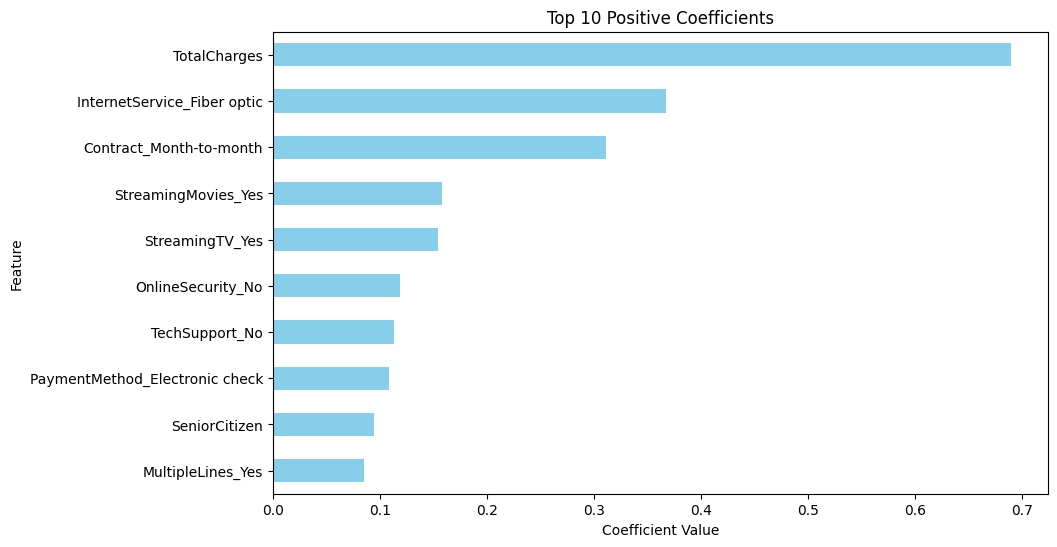

In [87]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0], index=X.columns.values)

# Select top 10 positive coefficients
top_positive_weights = weights[weights > 0].nlargest(10)

# Plot as a horizontal bar chart
plt.figure(figsize=(10, 6))
top_positive_weights.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Positive Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

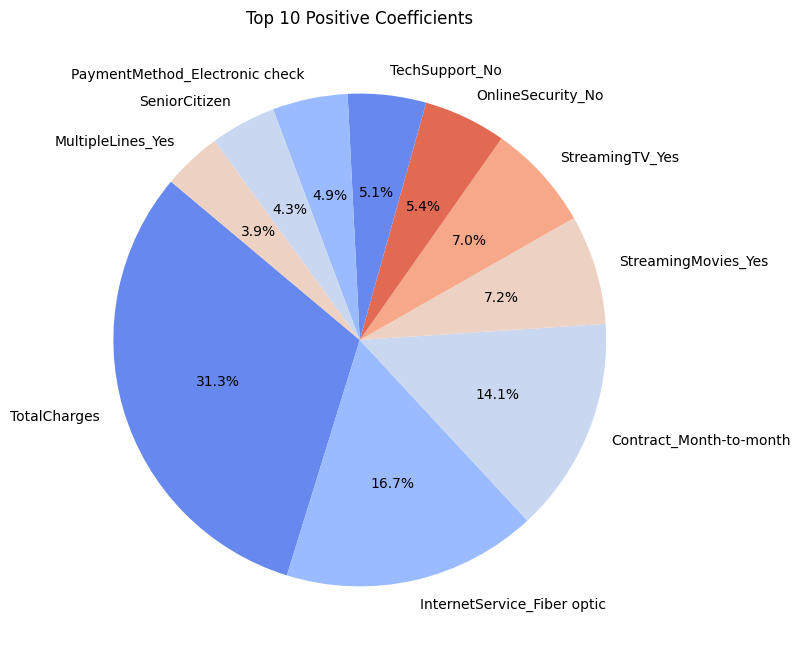

In [86]:
# Get coefficients and corresponding feature names
weights = pd.Series(model.coef_[0], index=X.columns.values)

# Select top 10 positive coefficients
top_positive_weights = weights[weights > 0].nlargest(10)

# Define custom colors for the bars
custom_colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'brown', 'grey', 'gold', 'lightgreen']


# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_positive_weights, labels=top_positive_weights.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
plt.title('Top 10 Positive Coefficients')
plt.show()

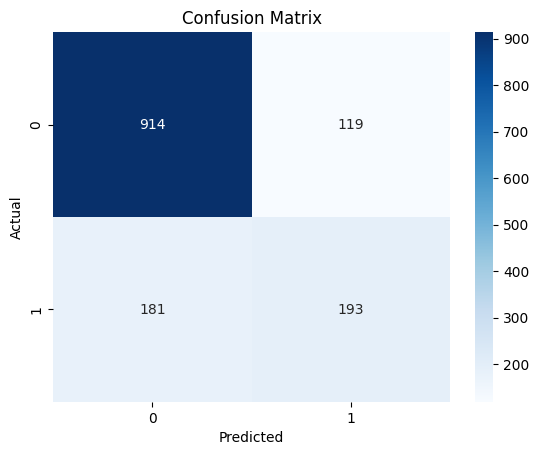

In [53]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

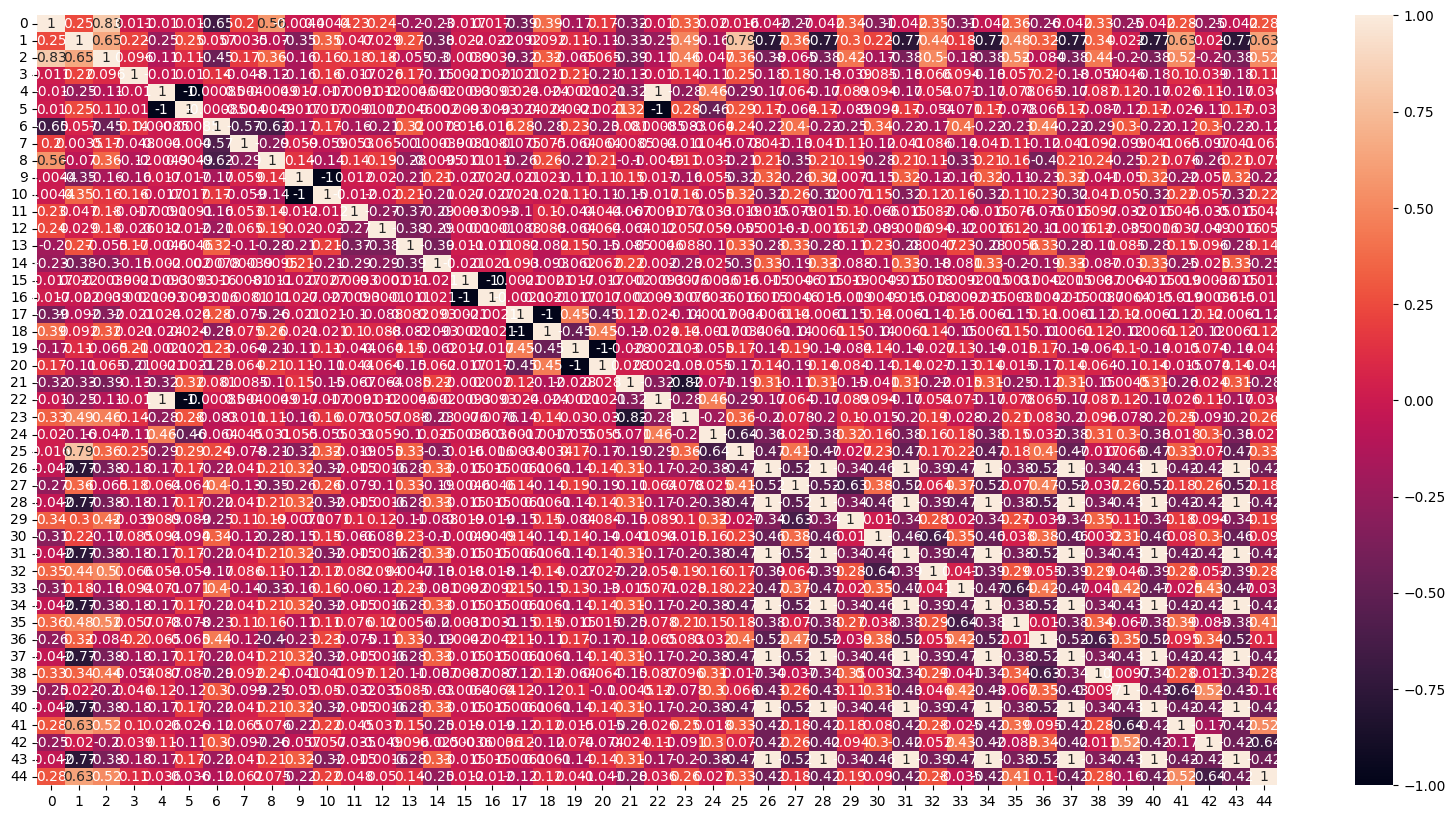

In [55]:
# Assuming X_train is a NumPy array, convert it back to a pandas DataFrame
X_train_df = pd.DataFrame(X_train)

# Create a heatmap for correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(X_train_df.corr(), annot=True)
plt.show()

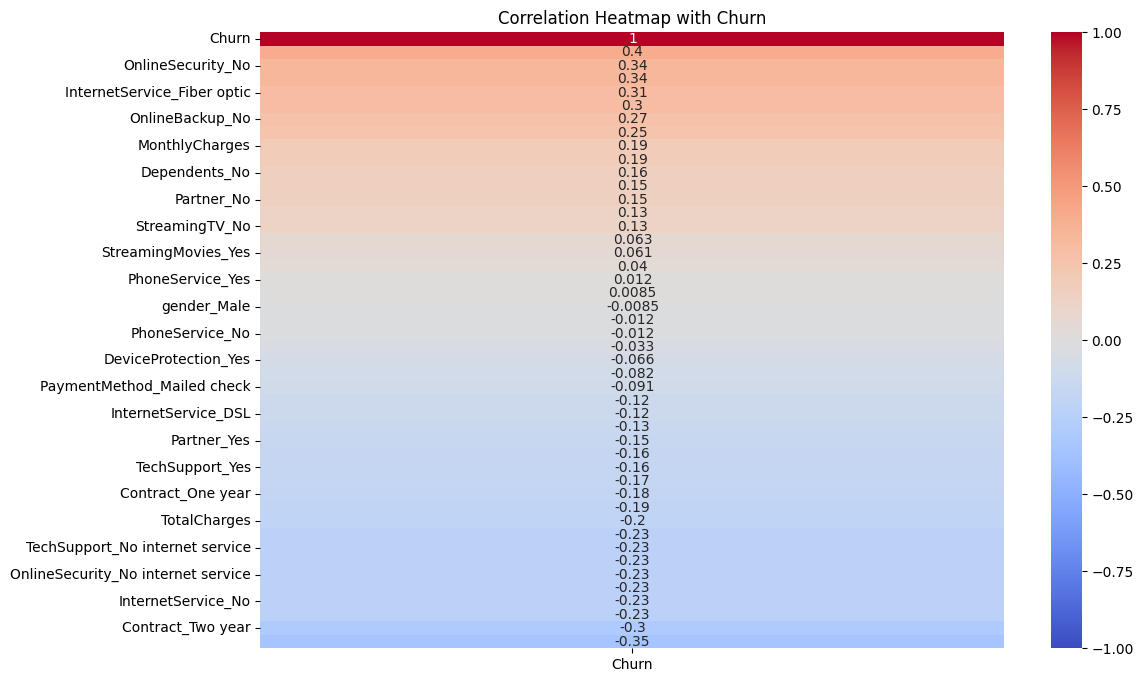

In [56]:
# Creating a heatmap to visualize feature correlations with 'Churn'
plt.figure(figsize=(12, 8))
sns.heatmap(df_dummies.corr()[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Churn')
plt.show()


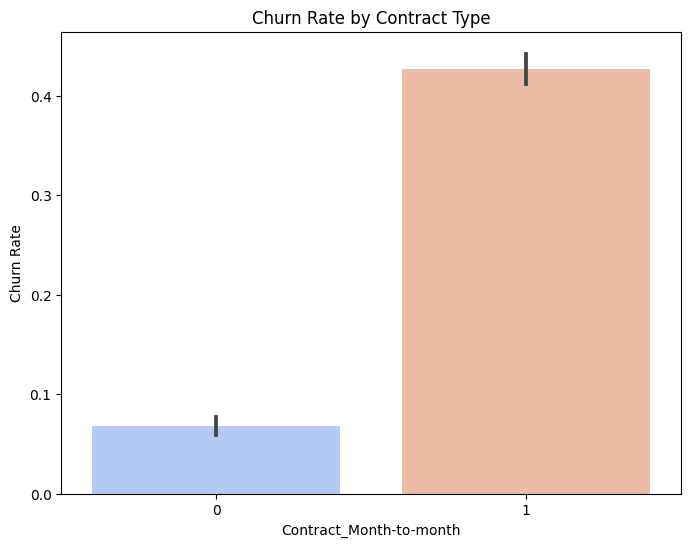

In [57]:
# Comparing 'Churn' with a categorical feature using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract_Month-to-month', y='Churn', data=df_dummies, palette='coolwarm')
plt.xlabel('Contract_Month-to-month')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()

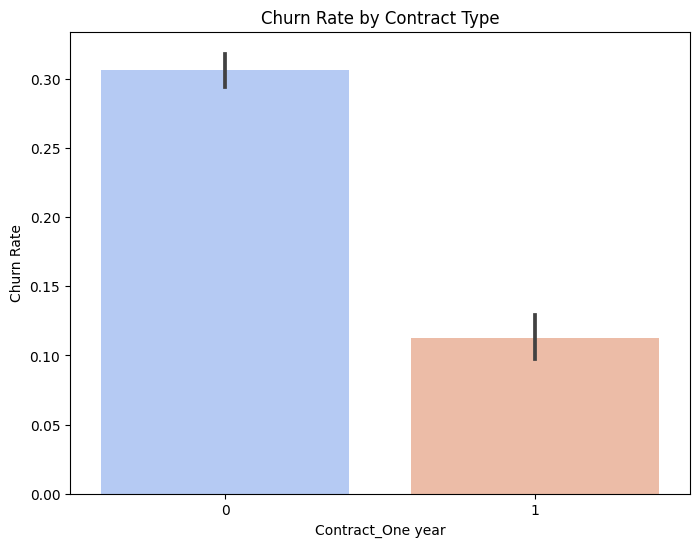

In [58]:
# Comparing 'Churn' with a categorical feature using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract_One year', y='Churn', data=df_dummies, palette='coolwarm')
plt.xlabel('Contract_One year')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()

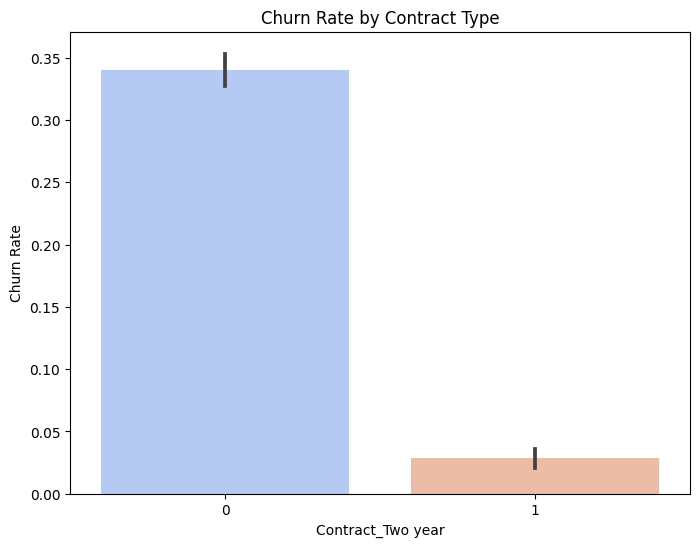

In [59]:
# Comparing 'Churn' with a categorical feature using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract_Two year', y='Churn', data=df_dummies, palette='coolwarm')
plt.xlabel('Contract_Two year')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()

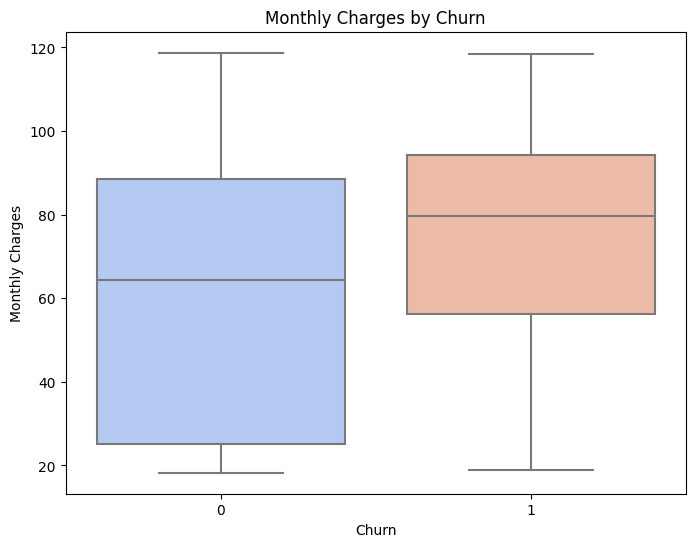

In [60]:
# Comparing 'Churn' with a numerical feature using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_dummies, palette='coolwarm')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn')
plt.show()

In [61]:
# Get the list of numerical feature column names from your DataFrame
numerical_features = df_dummies.select_dtypes(include=['float64', 'int64']).columns.tolist()


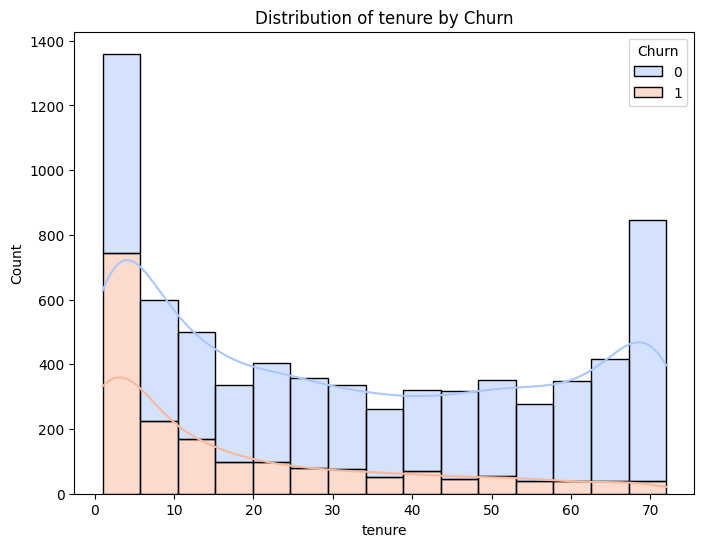

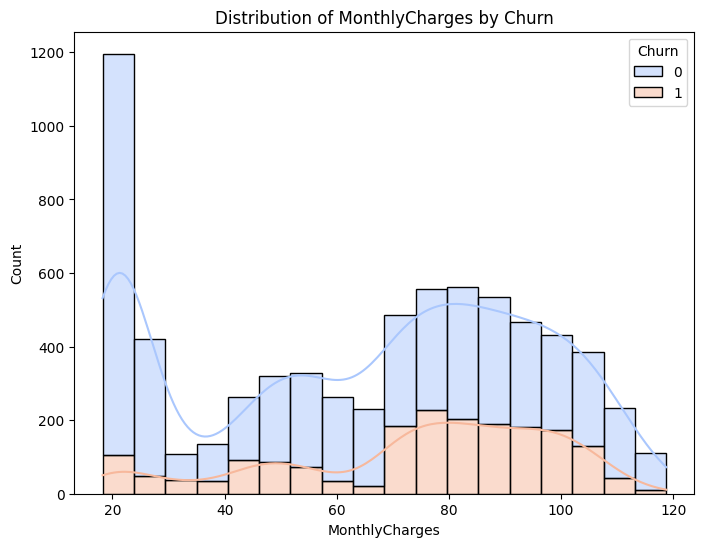

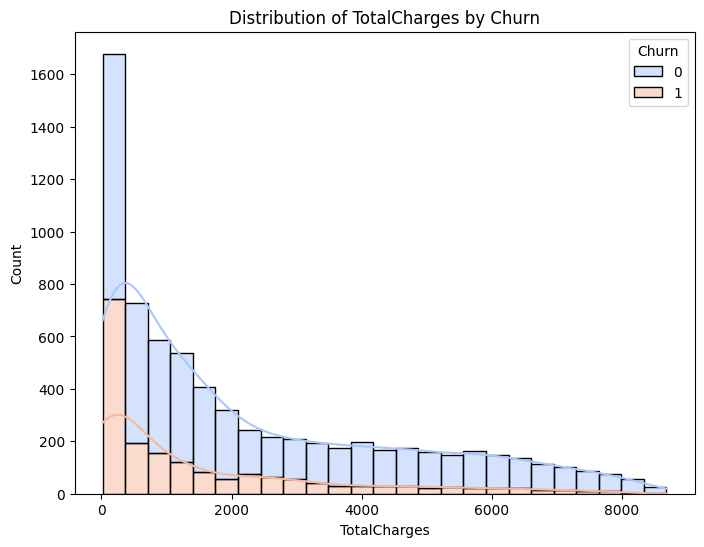

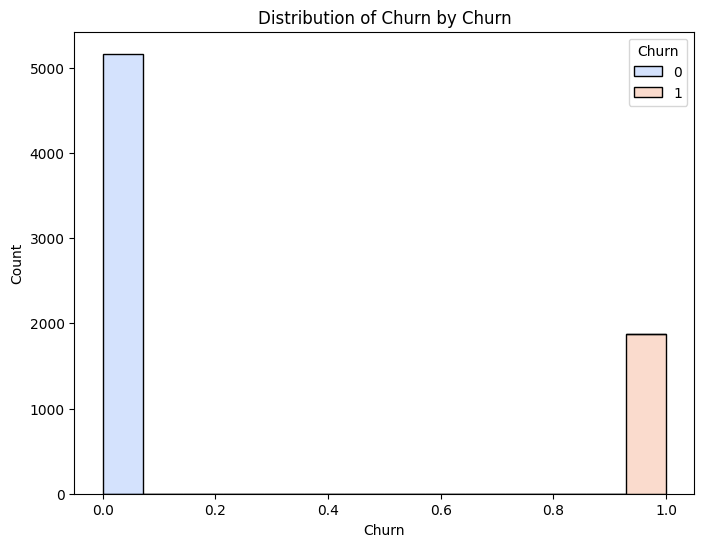

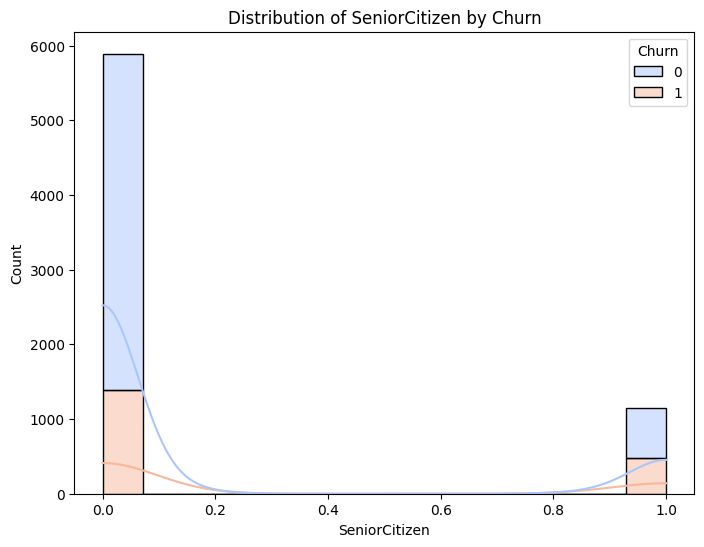

In [62]:
# Using histograms to compare the distribution of numerical features for churn and non-churn customers
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_dummies, x=feature, hue='Churn', multiple="stack", kde=True, palette='coolwarm')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()

In [63]:
print(df_dummies.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen',
       'PhoneService_No', 'PhoneService_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSu

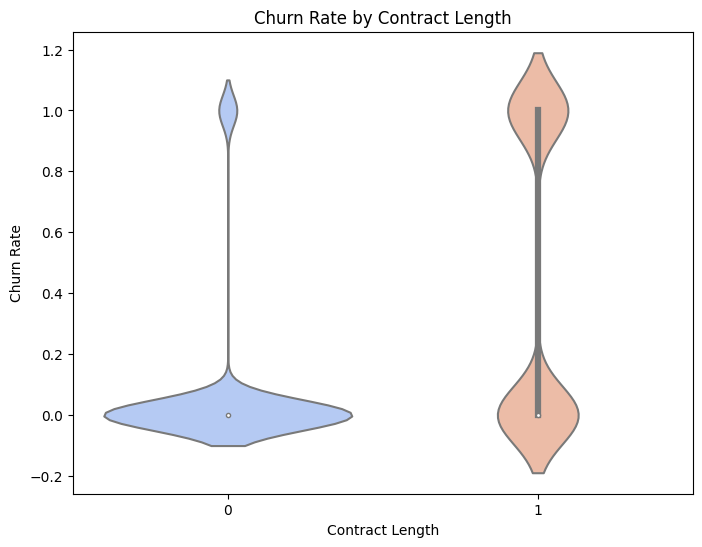

In [64]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Contract_Month-to-month', y='Churn', data=df_dummies, palette='coolwarm')
plt.xlabel('Contract Length')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Length')
plt.show()

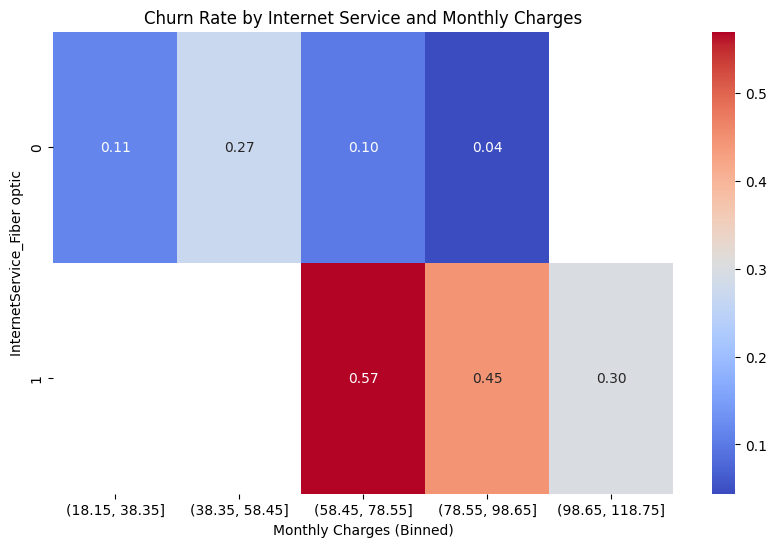

In [65]:
# Comparing Churn Rate by Internet Service and Monthly Charges Using Heatmap:
internet_monthly_churn = df_dummies.groupby(['InternetService_Fiber optic', pd.cut(df_dummies['MonthlyCharges'], bins=5)]).mean()['Churn'].reset_index()
internet_monthly_churn_pivot = internet_monthly_churn.pivot(index='InternetService_Fiber optic', columns='MonthlyCharges', values='Churn')
plt.figure(figsize=(10, 6))
sns.heatmap(internet_monthly_churn_pivot, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('Monthly Charges (Binned)')
plt.ylabel('InternetService_Fiber optic')
plt.title('Churn Rate by Internet Service and Monthly Charges')
plt.show()


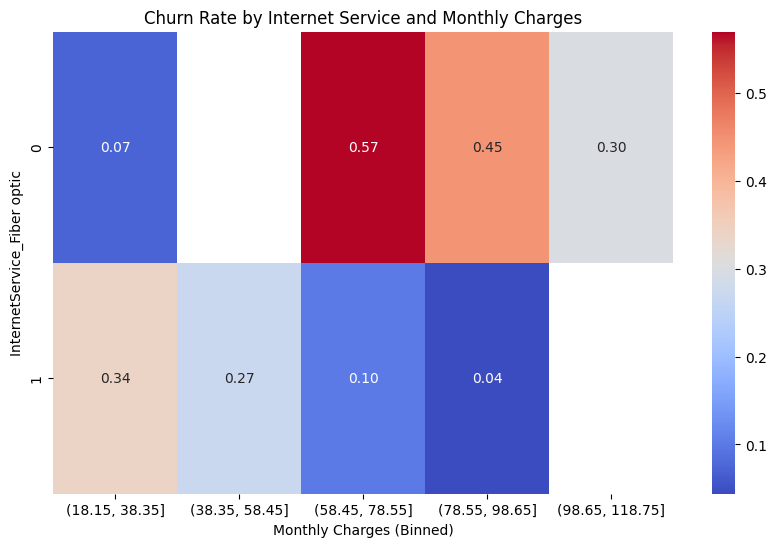

In [66]:
# Comparing Churn Rate by Internet Service and Monthly Charges Using Heatmap:
internet_monthly_churn = df_dummies.groupby(['InternetService_DSL', pd.cut(df_dummies['MonthlyCharges'], bins=5)]).mean()['Churn'].reset_index()
internet_monthly_churn_pivot = internet_monthly_churn.pivot(index='InternetService_DSL', columns='MonthlyCharges', values='Churn')
plt.figure(figsize=(10, 6))
sns.heatmap(internet_monthly_churn_pivot, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('Monthly Charges (Binned)')
plt.ylabel('InternetService_Fiber optic')
plt.title('Churn Rate by Internet Service and Monthly Charges')
plt.show()


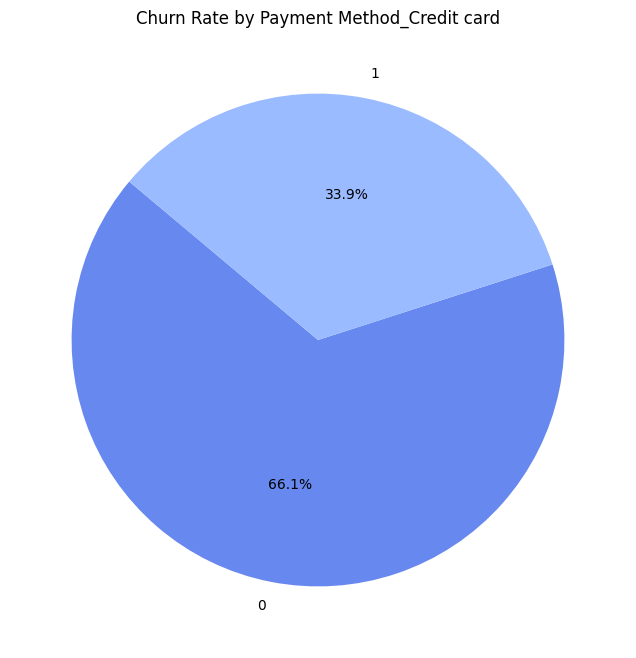

In [67]:
#Comparing Churn Rate by Payment Method Using Pie Chart
payment_method_churn = df_dummies.groupby('PaymentMethod_Credit card (automatic)')['Churn'].value_counts().unstack().fillna(0)
payment_method_churn['Churn Rate'] = payment_method_churn[1] / (payment_method_churn[0] + payment_method_churn[1])
plt.figure(figsize=(8, 8))
plt.pie(payment_method_churn['Churn Rate'], labels=payment_method_churn.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
plt.title('Churn Rate by Payment Method_Credit card')
plt.show()


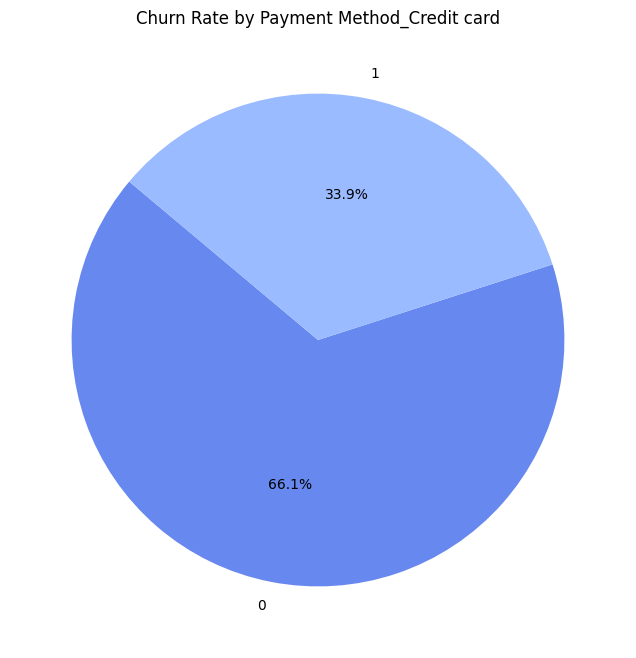

In [68]:
#Comparing Churn Rate by Payment Method Using Pie Chart
payment_method_churn = df_dummies.groupby('PaymentMethod_Credit card (automatic)')['Churn'].value_counts().unstack().fillna(0)
payment_method_churn['Churn Rate'] = payment_method_churn[1] / (payment_method_churn[0] + payment_method_churn[1])
plt.figure(figsize=(8, 8))
plt.pie(payment_method_churn['Churn Rate'], labels=payment_method_churn.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
plt.title('Churn Rate by Payment Method_Credit card')
plt.show()

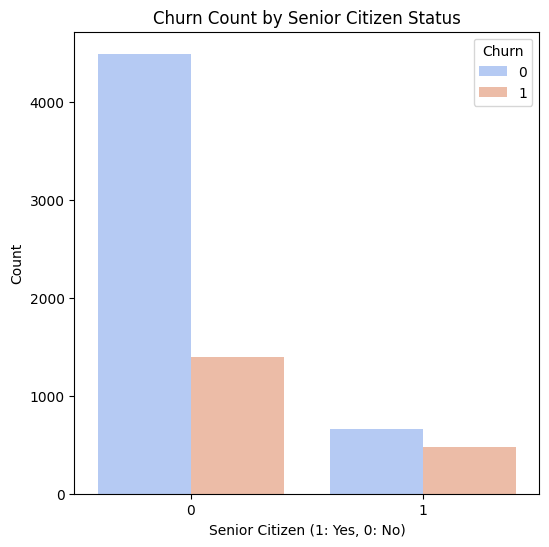

In [69]:
# Churn Rate by Senior Citizen Status Using Count Plot
plt.figure(figsize=(6, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df_dummies, palette='coolwarm')
plt.xlabel('Senior Citizen (1: Yes, 0: No)')
plt.ylabel('Count')
plt.title('Churn Count by Senior Citizen Status')
plt.show()

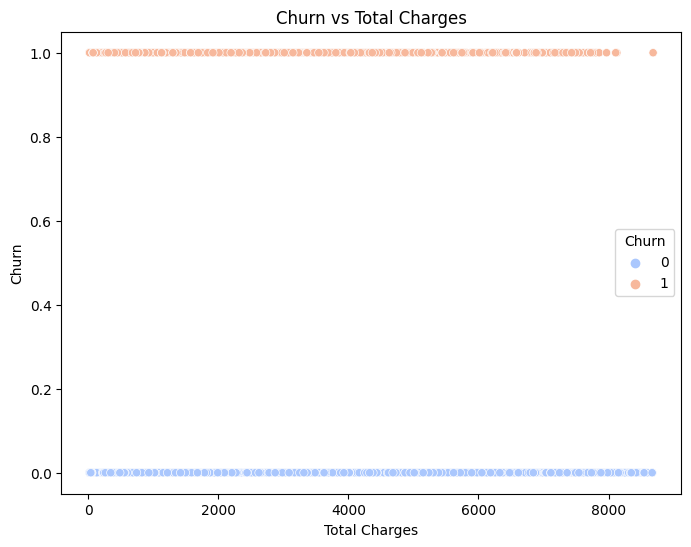

In [71]:
# Total charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalCharges', y='Churn', data=df_dummies, hue='Churn', palette='coolwarm')
plt.xlabel('Total Charges')
plt.ylabel('Churn')
plt.title('Churn vs Total Charges')
plt.show()

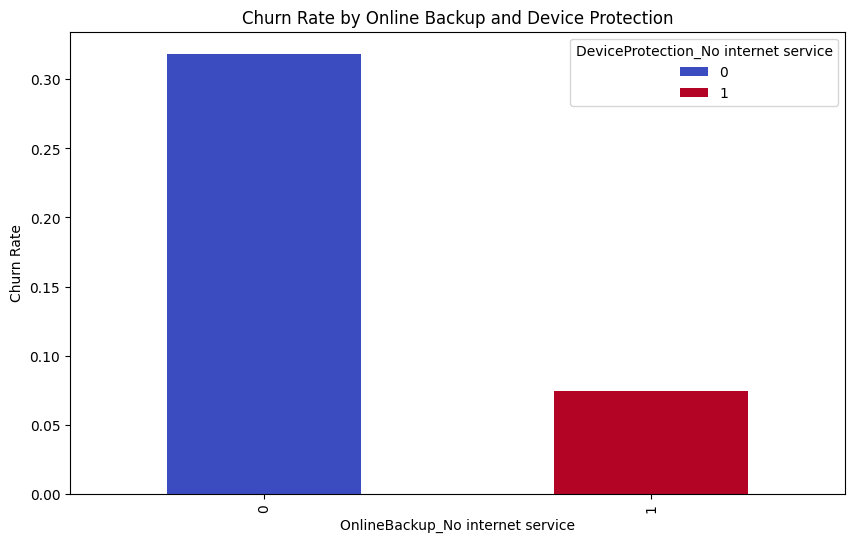

In [74]:
backup_protection_churn = df_dummies.groupby(['OnlineBackup_No internet service', 'DeviceProtection_No internet service'])['Churn'].mean().unstack()
backup_protection_churn.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.xlabel('OnlineBackup_No internet service')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Online Backup and Device Protection')
plt.show()

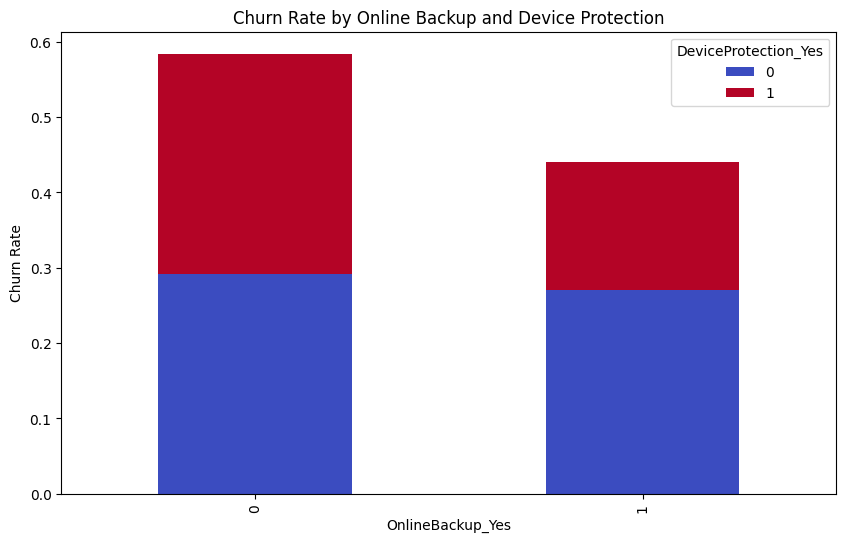

In [75]:
backup_protection_churn = df_dummies.groupby(['OnlineBackup_Yes', 'DeviceProtection_Yes'])['Churn'].mean().unstack()
backup_protection_churn.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.xlabel('OnlineBackup_Yes')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Online Backup and Device Protection')
plt.show()

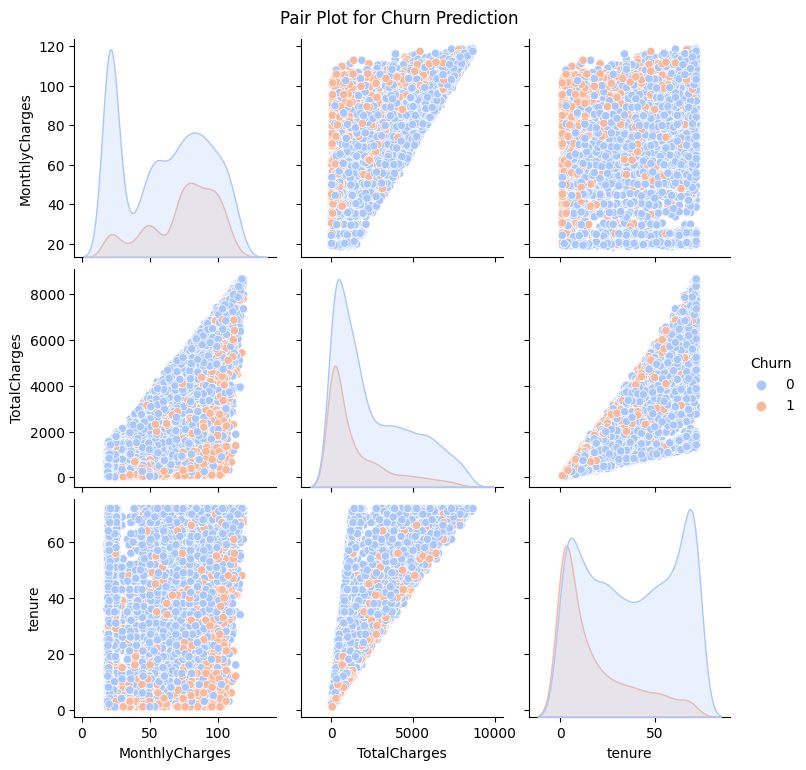

In [76]:
features_to_compare = ['MonthlyCharges', 'TotalCharges', 'tenure']
sns.pairplot(df_dummies, vars=features_to_compare, hue='Churn', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot for Churn Prediction', y=1.02)
plt.show()

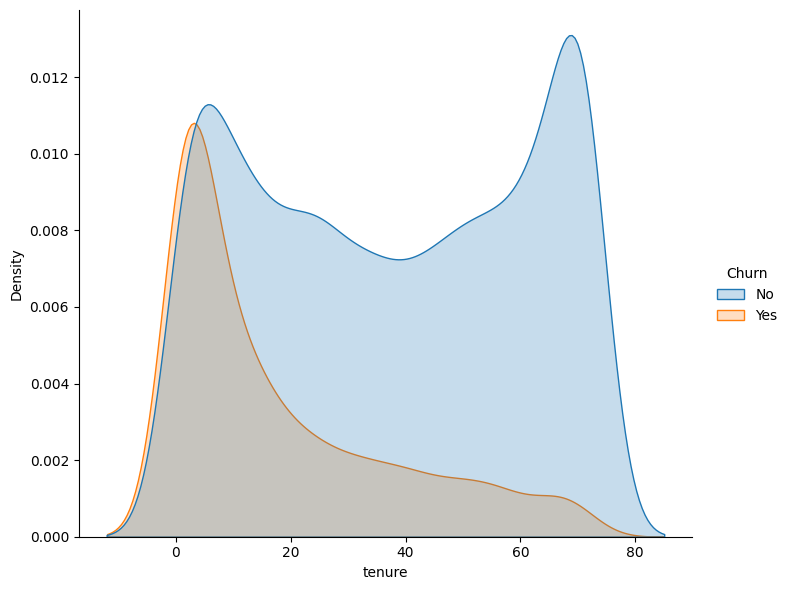

In [96]:
sns.displot(data=df, x='tenure', hue='Churn', kind='kde', fill=True, height=6, aspect=1.2)

Text(0.5, 1.0, 'Churn Distribution')

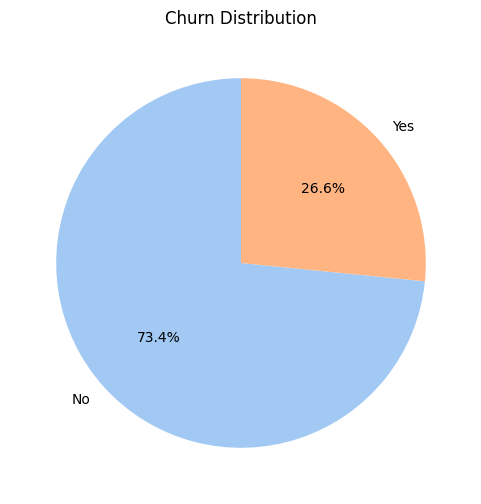

In [97]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Churn Distribution')

<Axes: xlabel='PhoneService', ylabel='count'>

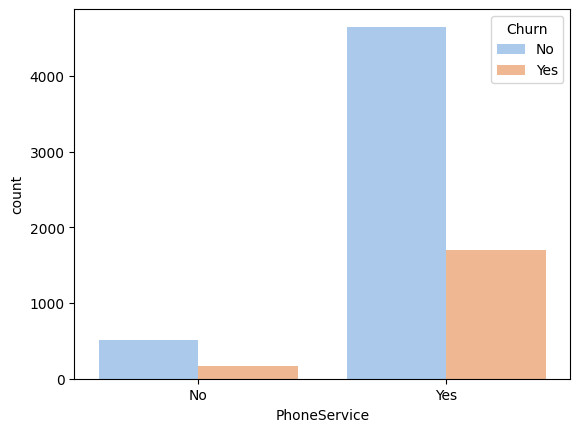

In [98]:
sns.countplot(x='PhoneService', hue='Churn', data=df, palette='pastel')

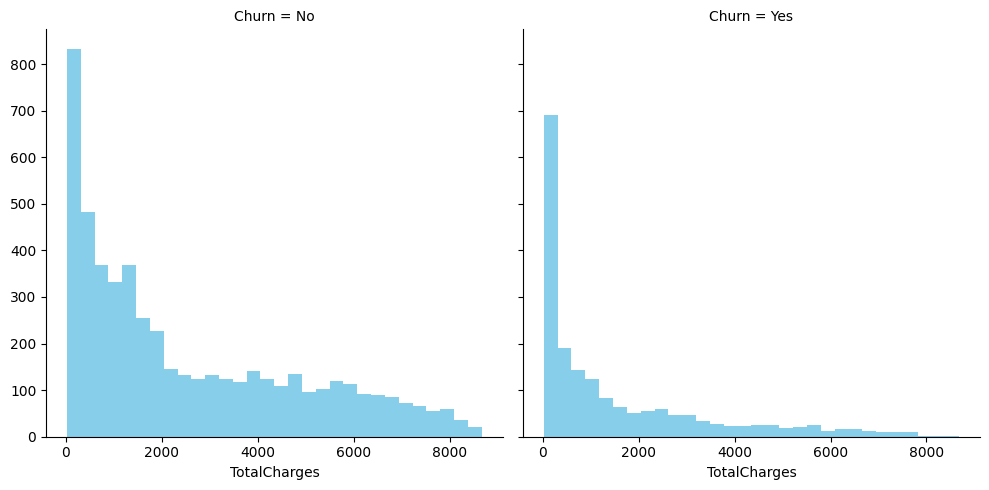

In [99]:
g = sns.FacetGrid(df, col='Churn', height=5)
g.map(plt.hist, 'TotalCharges', bins=30, color='skyblue')

<ipython-input-100-19d76080c316>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Churn', y='MonthlyCharges', data=df, ci='sd', palette='pastel')


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

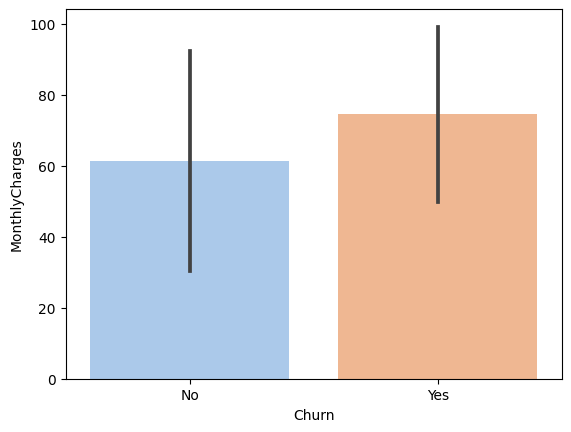

In [100]:
sns.barplot(x='Churn', y='MonthlyCharges', data=df, ci='sd', palette='pastel')

In [101]:
# Assuming you have trained a logistic regression model named 'model'
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-1.43959330e+00 -7.02641318e-01  6.89221459e-01  9.47982580e-02
  -1.09225538e-03  1.09225538e-03  3.10986355e-01 -6.06389488e-02
  -3.04569733e-01 -6.71978685e-02  6.71978685e-02 -1.29080003e-02
  -7.07098285e-02  1.08603231e-01 -4.01313141e-02  7.89460170e-03
  -7.89460170e-03 -1.24385427e-02  1.24385427e-02  4.97349929e-02
  -4.97349929e-02 -8.30499496e-02 -1.09225538e-03  8.48436957e-02
  -2.99217780e-01  3.67059687e-01 -9.74213717e-02  1.19129420e-01
  -9.74213717e-02 -4.25465511e-02  4.39686459e-02 -9.74213717e-02
   3.88984698e-02  1.95810301e-02 -9.74213717e-02  6.44471561e-02
   1.12788388e-01 -9.74213717e-02 -3.54483080e-02 -7.08967395e-02
  -9.74213717e-02  1.53995947e-01 -7.58229062e-02 -9.74213717e-02
   1.58343738e-01]]
Intercept: [-1.73551377]


In [102]:
# Assuming you have a test dataset X_test
predictions = model.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Assuming you have the true labels for the test dataset y_test
accuracy = accuracy_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
class_report = classification_report(Y_test, predictions)
roc_auc = roc_auc_score(Y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7867803837953091
Confusion Matrix:
[[914 119]
 [181 193]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC AUC Score: 0.7004221648177004


In summary, customers with shorter contracts tend to stay longer, while those with fiber optic internet are unexpectedly more likely to leave. DSL users show more loyalty, possibly due to satisfaction. High costs, including total charges and monthly fees, influence churn, especially for newer customers. Understanding these patterns can guide strategies to improve customer retention and service satisfaction.

The logistic regression model predicts telecom customer churn with an accuracy of approximately 78.7%. While it successfully identifies some churn cases, it misses around half of them, leading to limitations in precision and recall. Further refinement and feature analysis are needed to enhance prediction accuracy and reliability.